In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Loading the data

In [2]:
stats_df = pd.read_csv('NBA_future_PER_data.csv')
stats_df_copy = stats_df.copy()
#Drop columns that won't help our model
stats_df.drop(["Player", "Year","Pos", "Tm","GS","MP","G"],axis=1, inplace = True)


### Linear Regresion

In [3]:
#Split the dataframe to train and test
X_train1,X_test1,y_train1,y_test1 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [4]:
#Fit the model
lr = linear_model.LinearRegression()
lr.fit(X_train1,y_train1)

LinearRegression()

In [5]:
#Predict the outcome
y_pred1 = lr.predict(X_test1)
y_pred1

array([ 9.77503803, 16.87295662, 17.8373147 , ..., 20.77250348,
       10.99409702, 12.17924779])

In [6]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test1,y_pred1)}')
print(f'mse: {metrics.mean_squared_error(y_test1,y_pred1)}')


r^2: 0.6674933026874252
mse: 7.515896528902206


Text(0, 0.5, 'Predicted')

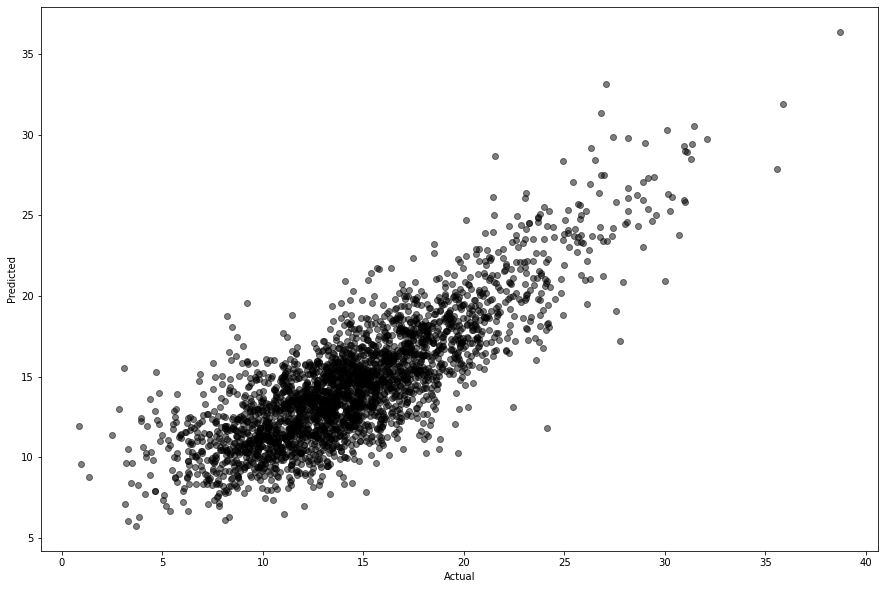

In [7]:
#We can see that our model predicted the PER with good results
plt.figure(figsize=(15,10))
plt.scatter(y_test1,y_pred1,color = 'k', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [8]:
#Check the difference between the predicted value and the actual value
compare_df = pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1,'Difference':abs(y_test1-y_pred1)})
compare_df

,Actual,Predicted,Difference
4078,11.43,9.775038,1.654962
4132,13.99,16.872957,2.882957
7415,16.76,17.837315,1.077315
7023,16.78,17.916273,1.136273
5993,12.00,13.613739,1.613739
...,...,...,...
3688,23.99,25.512303,1.522303
9197,15.15,18.640347,3.490347
756,24.10,20.772503,3.327497
2644,10.29,10.994097,0.704097


### Decision Tree Regressor


In [9]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()

In [10]:
#Split the dataframe to train and test
X_train2,X_test2,y_train2,y_test2 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [11]:
#Fit the model
DecisionTreeRegressor(random_state=42)
dectree.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [12]:
#Predict the outcome
y_pred2 = dectree.predict(X_test2)
y_pred2

array([ 8.97, 17.56, 16.16, ..., 24.22, 11.09, 13.08])

In [13]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test2,y_pred2)}')
print(f'mse: {metrics.mean_squared_error(y_test2,y_pred2)}')


r^2: 0.31092614440791577
mse: 15.575649577167017


Text(0, 0.5, 'Predicted')

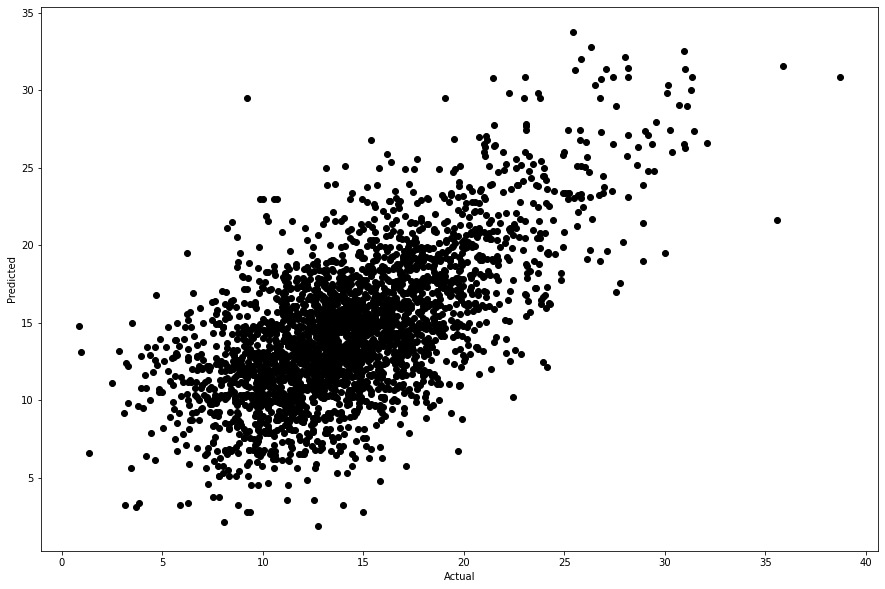

In [28]:
#We can see that our model predicted the PER with less better results
plt.figure(figsize=(15,10))
plt.scatter(y_test2,y_pred2,color = 'k')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [15]:
#Check the difference between the predicted value and the actual value
compare_df2 = pd.DataFrame({'Actual':y_test2,'Predicted':y_pred2,'Difference':abs(y_test2-y_pred2)})
compare_df2

,Actual,Predicted,Difference
4078,11.43,8.97,2.46
4132,13.99,17.56,3.57
7415,16.76,16.16,0.60
7023,16.78,19.92,3.14
5993,12.00,17.89,5.89
...,...,...,...
3688,23.99,24.48,0.49
9197,15.15,18.28,3.13
756,24.10,24.22,0.12
2644,10.29,11.09,0.80


### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
rndfor= RandomForestRegressor()

In [17]:
#Split the dataframe to train and test
X_train3,X_test3,y_train3,y_test3 = train_test_split(stats_df.drop(['Future_PER'],axis=1),stats_df['Future_PER'],test_size=0.3,random_state=42)

In [18]:
#Fit the model
RandomForestRegressor(random_state=42)
rndfor.fit(X_train3,y_train3)

RandomForestRegressor()

In [19]:
#Predict the outcome
y_pred3 = rndfor.predict(X_test3)
y_pred3

array([ 9.5964, 15.9488, 15.8104, ..., 21.7899, 10.2981, 12.5868])

In [20]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test3,y_pred3)}')
print(f'mse: {metrics.mean_squared_error(y_test3,y_pred3)}')

r^2: 0.6550652145605914
mse: 7.796817861219167


Text(0, 0.5, 'Predicted')

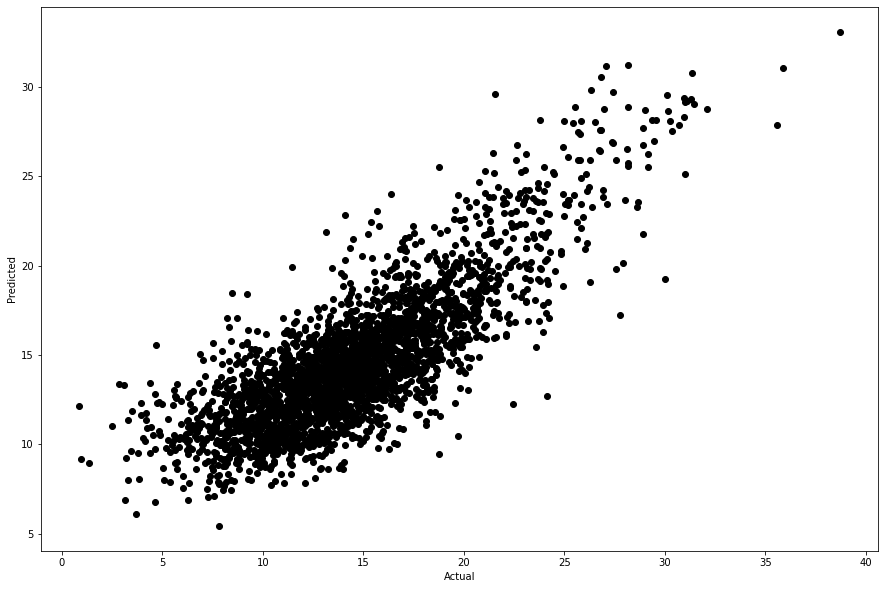

In [21]:
#We can see that our model predicted the PER with almost as good as linear regression results
plt.figure(figsize=(15,10))
plt.scatter(y_test3,y_pred3,color = 'k')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [22]:
#Check the difference between the predicted value and the actual value
compare_df3 = pd.DataFrame({'Actual':y_test3,'Predicted':y_pred3,'Difference':abs(y_test3-y_pred3)})
compare_df3

,Actual,Predicted,Difference
4078,11.43,9.5964,1.8336
4132,13.99,15.9488,1.9588
7415,16.76,15.8104,0.9496
7023,16.78,17.7023,0.9223
5993,12.00,12.7265,0.7265
...,...,...,...
3688,23.99,25.5071,1.5171
9197,15.15,17.8599,2.7099
756,24.10,21.7899,2.3101
2644,10.29,10.2981,0.0081


### MSE and R^2 score comparison

In [23]:
#Create dataframe for comparison of algorithms
r2_mse_comp_data = {'r^2':[metrics.r2_score(y_test1,y_pred1),metrics.r2_score(y_test2,y_pred2),metrics.r2_score(y_test3,y_pred3)],
                  'MSE':[metrics.mean_squared_error(y_test1,y_pred1),metrics.mean_squared_error(y_test2,y_pred2),
                         metrics.mean_squared_error(y_test3,y_pred3)]}
r2_mse_comp_df= pd.DataFrame(r2_mse_comp_data,index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'])
r2_mse_comp_df

,r^2,MSE
Linear Regression,0.667493,7.515897
Decision Tree Regressor,0.310926,15.575650
Random Forest Regressor,0.655065,7.796818


<module 'matplotlib.pyplot' from 'C:\\Users\\yardi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

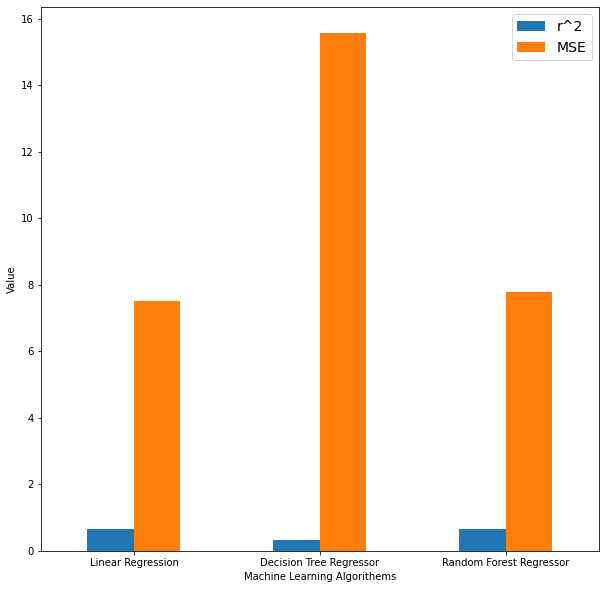

In [24]:
#We can see that the best algorithem is the one with the largest r^2 score and the minimal MSE score, meaning Linear Regression.
r2_mse_comp_df.plot.bar(rot=0,figsize=(10,10))
plt.legend(fontsize = 14)
plt.xlabel('Machine Learning Algorithems')
plt.ylabel('Value')
plt



### We can see that the Linear Regression has the besr r^2 score and the lowest mean square error

# We are predicting the 2021-2022 MVP based on the highest PER value

In [25]:
#We will use our linear regression model which was the most accurate to predict the future PER of the year 2021
#We will use the 2021 data as our X_test and we will get the y_test ( future PER )
#Loading the 2021 data
df_2021 = pd.read_csv('NBA_2021_clean_data.csv')
df_2021_copy = df_2021.copy()
#drop columns for the machine learning prediction
df_2021_copy.drop(["Player", "Year","Pos", "Tm","GS","MP","G"],axis=1, inplace = True)
y_pred2021 = lr.predict(df_2021_copy)
df_2021['Future PER'] = y_pred2021


In [26]:
df_2021.sort_values(by='PER',ascending=False)

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Future PER
211,2021,Nikola Jokić,C,25.0,DEN,72.0,72.0,2488.0,732.0,1293.0,...,575.0,780.0,599.0,95.0,48.0,222.0,192.0,1898.0,36.03,34.063469
116,2021,Joel Embiid,C,26.0,PHI,51.0,51.0,1585.0,461.0,899.0,...,426.0,539.0,145.0,50.0,69.0,159.0,123.0,1451.0,35.58,32.456005
9,2021,Giannis Antetokounmpo,PF,26.0,MIL,61.0,61.0,2013.0,626.0,1100.0,...,574.0,671.0,357.0,72.0,73.0,207.0,168.0,1717.0,35.25,33.804677
96,2021,Stephen Curry,PG,32.0,GSW,63.0,63.0,2152.0,658.0,1365.0,...,316.0,345.0,363.0,77.0,8.0,213.0,119.0,2015.0,33.40,30.029351
427,2021,Zion Williamson,PF,20.0,NOP,61.0,61.0,2026.0,634.0,1037.0,...,274.0,441.0,226.0,57.0,39.0,167.0,135.0,1647.0,32.06,30.358823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2021,P.J. Tucker,PF,35.0,TOT,52.0,33.0,1356.0,66.0,177.0,...,153.0,204.0,61.0,39.0,20.0,40.0,125.0,193.0,6.77,6.897844
314,2021,KZ Okpala,PF,21.0,MIA,37.0,9.0,447.0,36.0,96.0,...,47.0,68.0,19.0,10.0,11.0,15.0,59.0,92.0,6.53,9.874822
196,2021,Wesley Iwundu,SF,26.0,TOT,41.0,4.0,539.0,34.0,102.0,...,75.0,90.0,18.0,15.0,4.0,19.0,49.0,99.0,5.65,9.515461
47,2021,Isaac Bonga,SF,21.0,WAS,40.0,8.0,432.0,30.0,81.0,...,48.0,66.0,23.0,11.0,9.0,22.0,63.0,78.0,5.35,8.725911


# The player with the predicted highest PER is:

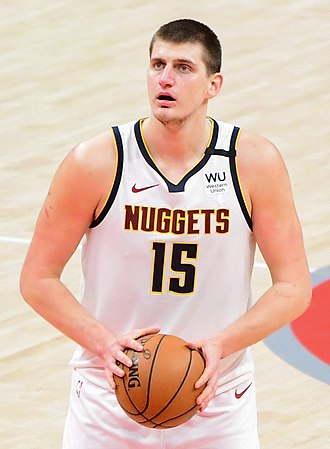

In [27]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Nikola_Jokic_free_throw_%28cropped%29.jpg/330px-Nikola_Jokic_free_throw_%28cropped%29.jpg")

## Nikola Jokić